In [ ]:
import pandas as pd
df = pd.read_csv('/data.csv')     #reading csv file
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [ ]:
#(3) Check if the data has null values.

df.isnull().any()  #check any column has null values

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [ ]:
#(3a) Replace the null values with the mean

mean=df['Calories'].mean()
df['Calories'].fillna(value=mean, inplace=True)  #replacing Nan values with particular columns mean value

In [ ]:
df.isnull().any()


Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [ ]:
#(4) Select at least two columns and aggregate the data using: min, max, count, mean.

df.agg({'Pulse' : ['min', 'max', 'count', 'mean'], 'Maxpulse' : ['min', 'max', 'count', 'mean'], 
        'Calories' : ['min', 'max', 'count', 'mean'] })
#agg method to aggreate operation on the dataframe

,Pulse,Maxpulse,Calories
min,80.000000,100.000000,50.300000
max,159.000000,184.000000,1860.400000
count,169.000000,169.000000,169.000000
mean,107.461538,134.047337,375.790244


In [ ]:
#(5) Filter the dataframe to select the rows with calories values between 500 and 1000. 

df[(df['Calories'] > 500) & (df['Calories'] < 1000)]   #'&' operator to filter the dataframe

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [ ]:
#(6) Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

df[(df['Calories'] > 500) & (df['Pulse'] < 100)]   # '&' operator is used to filter the data 

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [ ]:
#(7) Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

df_modified = df[['Duration', 'Pulse', 'Calories']].copy()  #copy method to create an another data frome with specified columns from the original dataframe.
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [ ]:
#(8) Delete the “Maxpulse” column from the main df dataframe

df.pop('Maxpulse')   #pop method to remove a column from the data frame
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [ ]:
df.dtypes


Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [ ]:
#(9) Convert the datatype of Calories column to int datatype.

df['Calories'] = df['Calories'].astype(int)  #astype function converts one data type into another
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Duration', ylabel='Calories'>

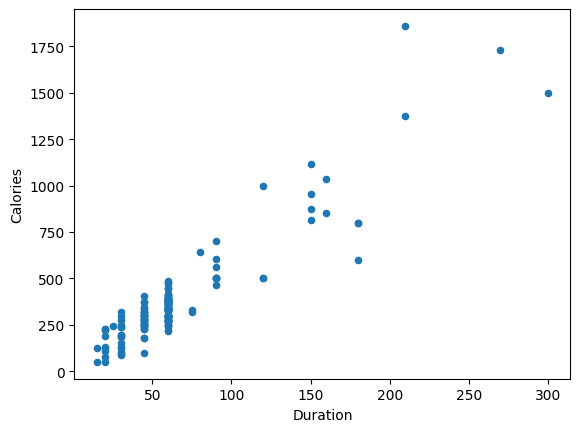

In [ ]:
#(10) Using pandas create a scatter plot for the two columns (Duration and Calories).
df.plot.scatter(x='Duration', y='Calories')

### **Question - 1**

In [ ]:
# Question - 1
import pandas as pd # importing libraries
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/train.csv") # reading train dataset

In [ ]:
df.head() #getting the rows from dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
le = preprocessing.LabelEncoder()  #finding the correlation between survived and sex 
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex'])

-0.5433513806577555

In [ ]:
matrix = df.corr() # printing the correlation matrix
print(matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

In [ ]:
df.corr().style.background_gradient(cmap="Blues") #colourmap for visualization 1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


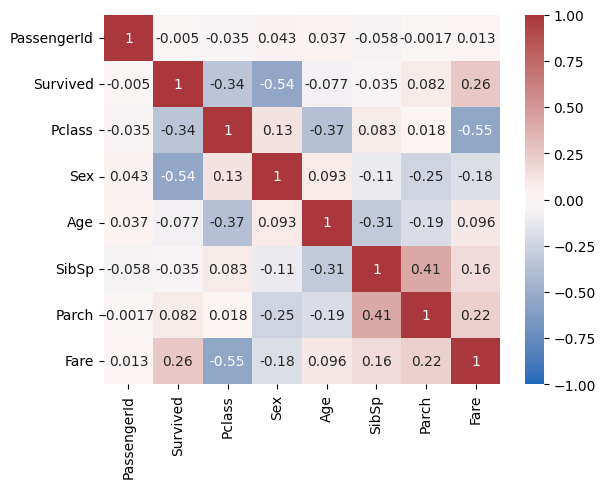

In [ ]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()  #heatmap for visualization 2

In [ ]:
#NAive bais

train_raw = pd.read_csv('/train.csv')
test_raw = pd.read_csv('/test.csv')

# Join data to analyse and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)




features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')

In [ ]:
# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values


train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate #importing train_test_split(),cross_validate from the library 

X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

In [ ]:
import warnings  #importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

%matplotlib inline
# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
classifier = GaussianNB() # train the classifier with X_train, Y_train
 
classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_val) #finding the accuracy

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

[[68 17]
 [18 40]]
accuracy is 0.7552447552447552


### **Question - 2**

In [ ]:
glass=pd.read_csv("/glass.csv") #importing glass dataset

In [ ]:
glass.head() #getting the rows from dataset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.corr().style.background_gradient(cmap="Reds")#colourmap for visualization 1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


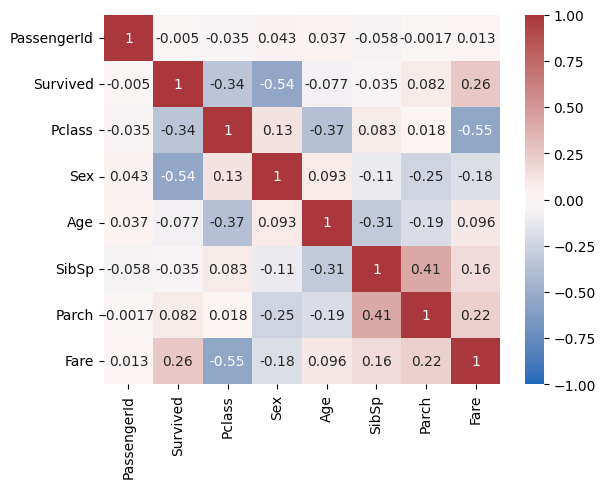

In [ ]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag') #colourmap for visualization 2
plt.show()

In [ ]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass['Type'],test_size=0.2, random_state=1)

classifier = GaussianNB()

classifier.fit(X_train, Y_train) # train the classifier with X_train, Y_train


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred)) #used to measure the quality of predictions from a classification algorithm
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred)) #finding the accuracy

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]
accuracy is 0.8372093023255814


In [ ]:
from sklearn.svm import SVC, LinearSVC #Implement linear SVM method using scikit library

classifier = LinearSVC()

classifier.fit(X_train, Y_train)
# train the classifier with X_train, Y_train

y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred)) #used to measure the quality of predictions from a classification algorithm
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score 
print('accuracy is',accuracy_score(Y_val, y_pred))  #finding the accuracy

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.00      0.00      0.00        12
           3       0.24      1.00      0.39         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4

    accuracy                           0.56        43
   macro avg       0.21      0.32      0.23        43
weighted avg       0.48      0.56      0.48        43

[[18  0  1  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  4  0  0  0]]
accuracy is 0.5581395348837209


In [ ]:
# Do at least two visualizations to describe or show correlations in the Glass Dataset.

In [ ]:
import seaborn as sns   #For Visualisation import seaborn library
import matplotlib.pyplot as plt
sns.barplot

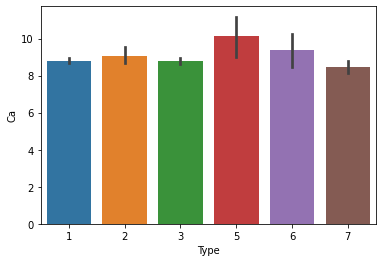

In [ ]:
sns.catplot(data=glass, x="Type", y="K")

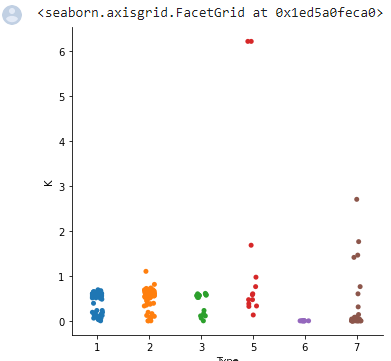

In [ ]:
sns.regplot(x="Type", y="Fe", data=glass);

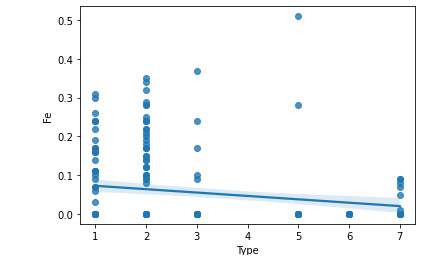